<a href="https://colab.research.google.com/github/RibesTomas/LABBigData/blob/main/Clasificador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importe de las librerias
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.graph_objects as go
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt


#Leemos el dataframe

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Canciones_Spotify.csv')

#Filtramos un poco el dataframe, dropeamos alginas columnas que no utilizamos

Esto lo decidimos hacer mas que nada para no tener el dataframe tan sobrecargado aunque en realidad no sirve para nada decidimos dejarlo

In [3]:
df.reset_index(drop=True, inplace=True)
df = df.drop('Unnamed: 0',axis=1)
df = df.drop('time_signature',axis=1)
df = df.drop('key',axis=1)
df = df.drop('mode',axis=1)
df = df.drop('duration_ms',axis=1)

In [4]:
df

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,target,song_title,artist
0,0.01020,0.833,0.434,0.021900,0.1650,-8.795,0.4310,150.062,0.286,1,Mask Off,Future
1,0.19900,0.743,0.359,0.006110,0.1370,-10.401,0.0794,160.083,0.588,1,Redbone,Childish Gambino
2,0.03440,0.838,0.412,0.000234,0.1590,-7.148,0.2890,75.044,0.173,1,Xanny Family,Future
3,0.60400,0.494,0.338,0.510000,0.0922,-15.236,0.0261,86.468,0.230,1,Master Of None,Beach House
4,0.18000,0.678,0.561,0.512000,0.4390,-11.648,0.0694,174.004,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,0.932,0.002690,0.1290,-3.501,0.3330,74.976,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,0.08770,0.894,0.892,0.001670,0.0528,-2.663,0.1310,110.041,0.867,0,Candy,Dillon Francis
2014,0.00857,0.637,0.935,0.003990,0.2140,-2.467,0.1070,150.082,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,0.00164,0.557,0.992,0.677000,0.0913,-2.735,0.1330,150.011,0.623,0,First Contact,Twin Moons


Definimos variables X e Y donde X tomaria valores del dataframe los cuales serian interesantes a evaluar e Y tendria los valores del target los cuales representan si les gusta o no al usuario las cancioles

En un principio nos costo mucho decidir que atributos utilizar en X y solo usabamos dos hasta que al testear mas adelante con otro modelo nos dimos cuenta que podiamos agregar mas atributos y fuimos refinando mas el modelo

In [5]:
X= df[["danceability", "speechiness", "energy","acousticness", "instrumentalness"]].to_numpy() #"acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence"
y= df[['target']].to_numpy()

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.6, random_state=53) #Se hace un split de los valores

Se define el clasificador KNN

In [6]:
clasificadorKNN = KNeighborsClassifier(n_neighbors=90)


clasificadorKNN = clasificadorKNN.fit(X_train, y_train.ravel())

In [7]:
def generate_clf_KNN(k, X_train, y_train):
    clasificadorKNN = KNeighborsClassifier(n_neighbors=k)
    clasificadorKNN.fit(X_train, y_train.ravel())
    return clasificadorKNN

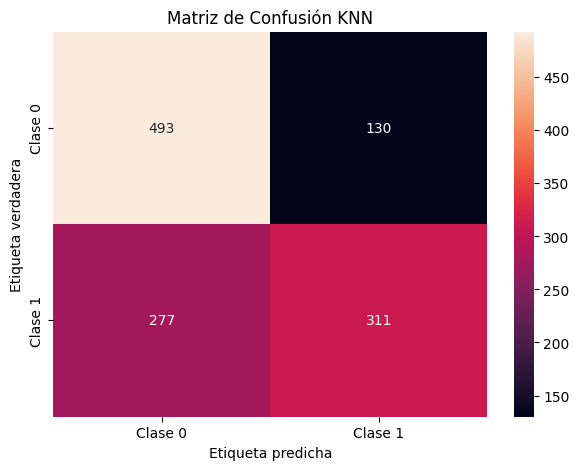

In [8]:
clasificadorKNN2 = generate_clf_KNN(90,X_train, y_train)

y_predKNN = clasificadorKNN2.predict(X_test)




c = confusion_matrix(y_test, y_predKNN)


plt.figure(figsize=(7,5))
sns.heatmap(c, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión KNN')
plt.show()

In [9]:
#knn = KNeighborsClassifier(n_neighbors=55)


scores = cross_val_score(clasificadorKNN, X, y.ravel(), cv=90) #Se realiza validacion cruzada dondo mas abajo se muetran los scores, algunos son bantante altos, llegando a 0,9 pero otros bastante bajos, por lo que queda una media alrededor de 0,6
f1 = f1_score(y_test, y_predKNN)
recall = recall_score(y_test, y_predKNN)

print("Scores de validación cruzada:", scores)
print("Media de los scores:", scores.mean())
print("Desviación estándar de los scores:", scores.std())
print("Score de F1:", f1)
print("Recall score:", recall)

Scores de validación cruzada: [0.82608696 0.69565217 0.82608696 0.86956522 0.73913043 0.7826087
 0.56521739 0.69565217 0.56521739 0.65217391 0.60869565 0.65217391
 0.69565217 0.73913043 0.56521739 0.56521739 0.52173913 0.52173913
 0.60869565 0.65217391 0.73913043 0.60869565 0.73913043 0.82608696
 0.65217391 0.52173913 0.60869565 0.52173913 0.56521739 0.47826087
 0.69565217 0.69565217 0.69565217 0.73913043 0.73913043 0.47826087
 0.47826087 0.27272727 0.68181818 0.86363636 0.59090909 0.59090909
 0.5        0.54545455 0.81818182 0.77272727 0.77272727 0.81818182
 0.72727273 0.77272727 0.77272727 0.90909091 0.72727273 0.59090909
 0.5        0.68181818 0.77272727 0.77272727 0.59090909 0.54545455
 0.81818182 0.72727273 0.68181818 0.54545455 0.59090909 0.59090909
 0.59090909 0.68181818 0.54545455 0.72727273 0.40909091 0.77272727
 0.68181818 0.68181818 0.81818182 0.59090909 0.77272727 0.68181818
 0.81818182 0.68181818 0.81818182 0.59090909 0.77272727 0.77272727
 0.5        0.54545455 0.40909091

#Modelo de aprendizaje SVM

In [10]:
def plot_decision_boundary(clf, X, y, ax, title):

    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)
    ax.set_title(title)

Para este modelo y los siguientes decidimos utilizar los mismos atrributos debido a que decidimos que eran los mas importantes

Fuimos probando con los distintos kernel, C y gamma para intentar alcanzar el mejor accuracy posible, tambien fuimos probando con el gridseach y randomsearch para alcanzar los mejores valores

A la hora de testear con gammas altos la prediccion de poly mejora a estar a la par que con la de rbf con el gamma en default pero llegaba a tener un tiempo de ejecución bastante alto llegando a ser casi interminable

In [11]:
X= df[["danceability", "speechiness", "energy","acousticness", "instrumentalness"]].values #"acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence"
y= df.target

#Trabajamos con los mismos datos que el modelo anterior ya que fueron los que cosideramos mas importantes

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.6, random_state=53) #Se hace un split de los valores
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


kernels = ["linear", "rbf", "poly"]
#kernels = ['rbf']
for kernel in kernels: #Analizamos ajustando para ver kis scires
    #Probamos con los kernels, tanto como los 3 vistos en clase como con sigmoid y precomputed ademas de ir ajustando el C, los cuales sacamos debido al bajo score
    model = SVC(kernel=kernel, C = 90) #Decidimos dejar el gamma en default debido a que empeoraba la prediccion al cambiarlo y en caso del poly mejoraba un poco al aumentar el gamma pera tomaba tiempos de ejecucion interminables
    model.fit(X_train, y_train)
    predSVC = model.predict(X_test)
    f1 = f1_score(y_test, predSVC)
    recall = recall_score(y_test, predSVC)
    print("Accuracy using {}:".format(kernel), accuracy_score(predSVC, y_test)) #Con los ajustes que fuimos asientdo descubrimos que el rbf era el mejor para nuestro caso
    print("Score de F1:", f1)
    print("Recall score:", recall)

Accuracy using linear: 0.6399669694467383
Score de F1: 0.6079136690647482
Recall score: 0.5748299319727891
Accuracy using rbf: 0.7101568951279934
Score de F1: 0.6852017937219732
Recall score: 0.6496598639455783
Accuracy using poly: 0.6878612716763006
Score de F1: 0.638623326959847
Recall score: 0.5680272108843537


La matriz la imprimimos con RBF debido a que es el kernel con el cual mejor desempeño se tuvo

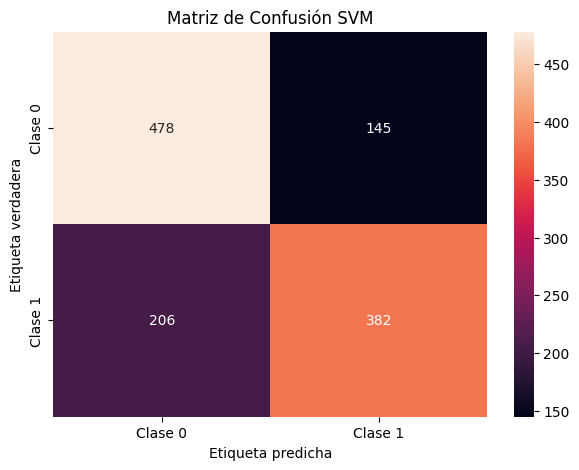

In [12]:
model = SVC(kernel="rbf", C = 90)
model.fit(X_train, y_train)
predSVC = model.predict(X_test)


c = confusion_matrix(y_test, predSVC)


plt.figure(figsize=(7,5))
sns.heatmap(c, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión SVM')
plt.show()

#Gridsearch

Probamos el grid search visto en clase con distintos parametros los cuales creimos interesantes

No probamos con gammas mas altos debido a su alto tiempo de ejecución

In [13]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10, 20, 30, 50, 90], 'gamma': ["auto", "scale",0.1, 1, 10]}
svc = SVC()
clf = GridSearchCV(svc, parameters, scoring='f1_macro') #Usamos el randomsearch para ver cual decide como los mejores parametros
clf.fit(X_train, y_train)

print("Mejores parámetros:", clf.best_params_)

print("Mejor score:", clf.best_score_)

Mejores parámetros: {'C': 90, 'gamma': 'scale', 'kernel': 'rbf'}
Mejor score: 0.7068411242774385


#Randomsearch

El random search encuentra como C optimo varios valores, con cada ejecución suele mostrar valores distintos, los cuales algunos se repiten, nosotros probamos y concluimos que dependiendo el caso un kernel es mejor que el otro pero ambos son bastante altos a la hora de predecir

En cuanto al gamma generalmente nos dice que el mejor gamma es scale aunque hay ocaciones en las cuales retorna valores distintos

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

model = SVC()

# Definir el espacio de búsqueda de hiperparámetros específico para SVM
parameters = {
    'C': [0.1, 1, 10, 20, 30, 50, 90],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7))
}
clf = RandomizedSearchCV(model, parameters)
search = clf.fit(X, y)

print("Mejores parámetros:", search.best_params_)
print("Mejor score:", search.best_score_)

Mejores parámetros: {'kernel': 'rbf', 'gamma': 'scale', 'C': 50}
Mejor score: 0.6514433825516546


#Regresion logica


Decidimos probar esto modelo buscando info en internet debido a que estaba nombrado en las diapositivas y nos parecio interesante

In [15]:
import statsmodels.api as sm  #Importamos librerias del modelo
import statsmodels.formula.api as smf

In [16]:
X= df[["danceability", "speechiness", "energy","acousticness", "instrumentalness"]].to_numpy()
y= df[['target']].to_numpy()
#Trabajamos con los mismos datos
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.6, random_state=53)

In [17]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train,)
modelo = modelo.fit()     #Entrenamos el modelo

Optimization terminated successfully.
         Current function value: 0.643797
         Iterations 5


In [18]:
predicciones = modelo.predict(exog = X_train)

clasificacion = np.where(predicciones<0.5, 0, 1) #Esta clasificacion hace que las predicciones, las cuales son resultados de 0 a 1 en relacion a la tendencia de que sea target 0 o 1, sean traspazadas a un nuevo array como enteres 0 o 1

En cuanto a este modelo tuvimos algunos problemas para ajustarlo para alcanzar valores mas altos, aun si logramos dejarlo con valores alrededor del 60%

In [19]:

X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
clasificacion = np.where(predicciones<0.46, 0, 1) #Modificamos el rango de tendencia debido a que aumentaba la prediccion
f1 = f1_score(y_test, clasificacion)
recall = recall_score(y_test, clasificacion)
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = clasificacion,
          normalize = True
         )
print(f"El accuracy de test es: {100*accuracy}%")
print("Score de F1:", f1)
print("Recall score:", recall)

El accuracy de test es: 60.611065235342686%
Score de F1: 0.6505494505494506
Recall score: 0.7551020408163265


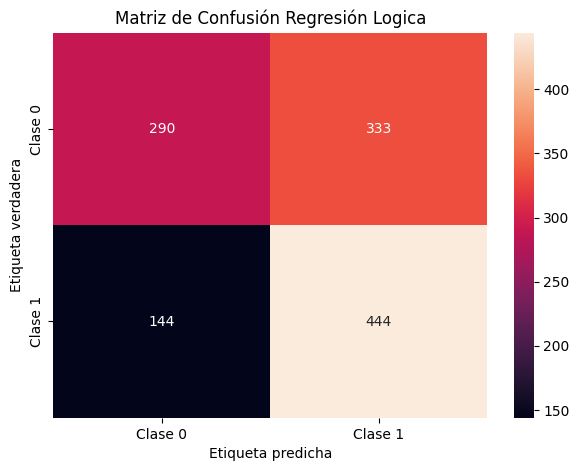

In [20]:
c = confusion_matrix(y_test, clasificacion)


plt.figure(figsize=(7,5))
sns.heatmap(c, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión Regresión Logica')
plt.show()

#Clasidicador Bayesiano

In [21]:
X = df[["danceability", "speechiness", "energy","acousticness", "instrumentalness"]].values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=53)

In [22]:
from sklearn.preprocessing import MinMaxScaler
escaladorX = MinMaxScaler()
X_train = escaladorX.fit_transform(X_train.astype('float64'))
X_test  = escaladorX.transform(X_test.astype('float64'))
X_test[:5,:]

array([[7.70301624e-01, 4.81836529e-02, 5.99551661e-01, 7.81449852e-03,
        0.00000000e+00],
       [6.67053364e-01, 1.08476287e-02, 6.76992052e-01, 2.95870718e-04,
        6.90573770e-03],
       [5.99767981e-01, 1.62714430e-02, 8.49195028e-01, 6.64278354e-02,
        2.04918033e-02],
       [5.81206497e-01, 1.51362260e-02, 8.05380069e-01, 1.56738314e-02,
        7.87909836e-02],
       [5.29002320e-01, 4.88143290e-02, 8.66517220e-01, 7.04062559e-03,
        0.00000000e+00]])

In [23]:
from sklearn.naive_bayes import GaussianNB as Bayesiano
clasificador = Bayesiano()
clasificador.fit(X_train, y_train)

GaussianNB()

In [24]:
predicciones = clasificador.predict(X_test)

En cuanto a este modelo decidimos agregarlo debido a que nos parecio intereante ya casi llegado al final, intetamos trabajar bastante con el pero nos dio algunos problemas por ende decidimos dejarlo pero solo con los parametros basicos

In [25]:

f1 = f1_score(y_test, predicciones)
recall = recall_score(y_test, predicciones)

print("Accuracy score ", accuracy_score(predicciones, y_test))
print("Score de F1:", f1)
print("Recall score:", recall)

Accuracy using {}: 0.6204162537165511
Score de F1: 0.6456984273820536
Recall score: 0.7137014314928425


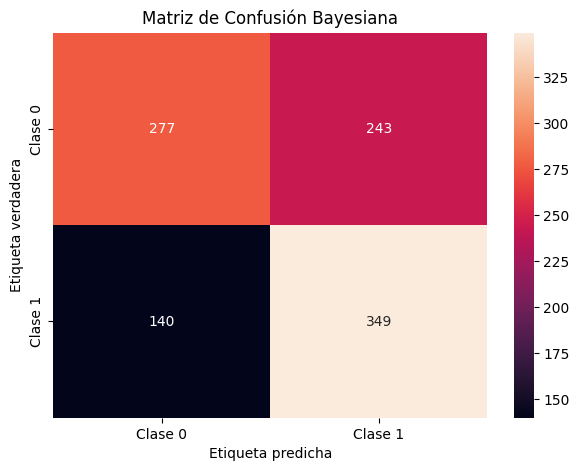

In [26]:
c = confusion_matrix(y_test, predicciones)


plt.figure(figsize=(7,5))
sns.heatmap(c, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión Bayesiana')
plt.show()

#Votación mayoritaria

In [27]:
X = df[["danceability", "speechiness", "energy","acousticness", "instrumentalness"]].values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=53)

Para hacer la votación mayoritaria los que nosotros pensamos era usar los 3 modelos los cuales nos dieron mayor porcentaje de acierto

In [28]:
clasificadorKNN2 = generate_clf_KNN(90,X_train, y_train)

y_predKNN = clasificadorKNN2.predict(X_test)

model = SVC(kernel="rbf", C = 90)
model.fit(X_train, y_train)
predSVC = model.predict(X_test)

clasificador = Bayesiano()
clasificador.fit(X_train, y_train)
predicciones = clasificador.predict(X_test)

Para la realización de las predicciones decidimos crear una lista la cual la iremos rellenando al recorr el ciclo for donde don modelos coincidad en la predicción

In [29]:
predicFinal = []
for i in range(len(predicciones) ):
  if y_predKNN[i] == predSVC[i]:
    predicFinal.append(y_predKNN[i])
  elif predicciones[i] == y_predKNN[i]:
    predicFinal.append(predicciones[i])
  elif predicciones[i] == predSVC[i]:
    predicFinal.append(predicciones[i])

f1 = f1_score(y_test, predicFinal)
recall = recall_score(y_test, predicFinal)

print("Accuracy using {}:", accuracy_score(predicFinal, y_test)) #Realizamos el score de la votacion mayoritaria usando los 3 con mayores predicción
print("Score de F1:", f1)
print("Recall score:", recall)

Accuracy using {}: 0.7026759167492567
Score de F1: 0.6703296703296703
Recall score: 0.623721881390593


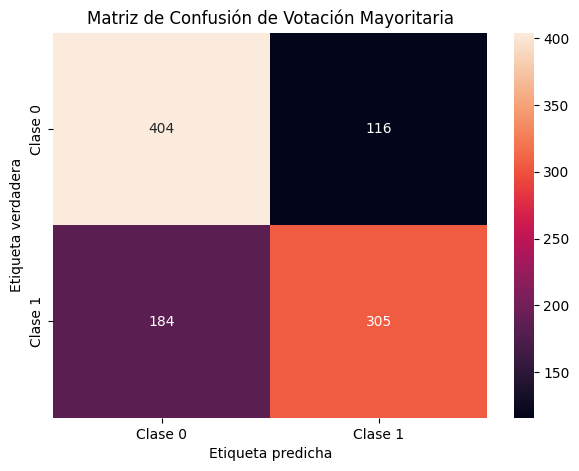

In [30]:
c = confusion_matrix(y_test, predicFinal)


plt.figure(figsize=(7,5))
sns.heatmap(c, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión de Votación Mayoritaria')
plt.show()

In [33]:
from sklearn.ensemble import VotingClassifier


Tambien decidimos usar el VotingClassifier de la propia libreria de sklearn pero nos termino dando los mismos resultados

In [44]:
clf1 = KNeighborsClassifier(n_neighbors=90)
clf2 = Bayesiano()
clf3 = SVC(kernel="rbf", C = 90)

voting_classifier = VotingClassifier(estimators=[('clf1', clf1), ('clf2', clf2), ('clf3', clf3)], voting='hard')

voting_classifier.fit(X_train, y_train)

y_pred = voting_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7026759167492567